# Markdown 
Otras formas de trabajo
#   Datos a usar
cuántitativas: 
P3094S3 : Cuánto ahorro por cultivar
P3087S1: Valor mensual por practicas o pasantías
P3095S3: Valor ahorra por criar animales
# Cualitativas
P3101: ¿Fue a reuniones familiares durante las ultimas 4 semanas? si o no

### P3087S1

In [38]:
library(readr)

# Datos de valor mensual por practicas o pasantias
formas_trabajo_mayo <- read_delim(
  'Mayo_2024 1/CSV/Otras formas de trabajo.CSV',
  delim = ";", escape_double = FALSE, trim_ws = TRUE,
  col_types = cols(.default = "c") # convertir a caracteres
)

formas_trabajo_junio <- read_delim(
  'Junio_2024/CSV/Otras formas de trabajo.CSV',
  delim = ";", escape_double = FALSE, trim_ws = TRUE,
  col_types = cols(.default = "c") # convertir a caracteres
)

formas_trabajo_julio <- read_delim(
  'Julio_2024/CSV/Otras formas de trabajo.CSV',
  delim = ";", escape_double = FALSE, trim_ws = TRUE,
  col_types = cols(.default = "c") # convertir a caracteres
)

#### Procesamiento
library(dplyr)

formas_trabajo <- bind_rows(
    formas_trabajo_mayo, # nolint
    formas_trabajo_junio,
    formas_trabajo_julio
)

In [40]:
# Esta es una función muy útil para crear gráficas múltiples
multiplot <- function(..., plotlist=NULL, file, cols=1, layout=NULL) {
  library(grid)
  plots <- c(list(...), plotlist)
  numPlots = length(plots)
  if (is.null(layout)) {
    layout <- matrix(seq(1, cols * ceiling(numPlots/cols)),
                    ncol = cols, nrow = ceiling(numPlots/cols))
  }
 if (numPlots==1) {
    print(plots[[1]])
  } else {
    grid.newpage()
    pushViewport(viewport(layout = grid.layout(nrow(layout), ncol(layout))))
    for (i in 1:numPlots) {
      matchidx <- as.data.frame(which(layout == i, arr.ind = TRUE))

      print(plots[[i]], vp = viewport(layout.pos.row = matchidx$row,
                                      layout.pos.col = matchidx$col))
    }
  }
}

Warning message:
"Removed 166005 rows containing non-finite outside the scale range
(`stat_boxplot()`)."


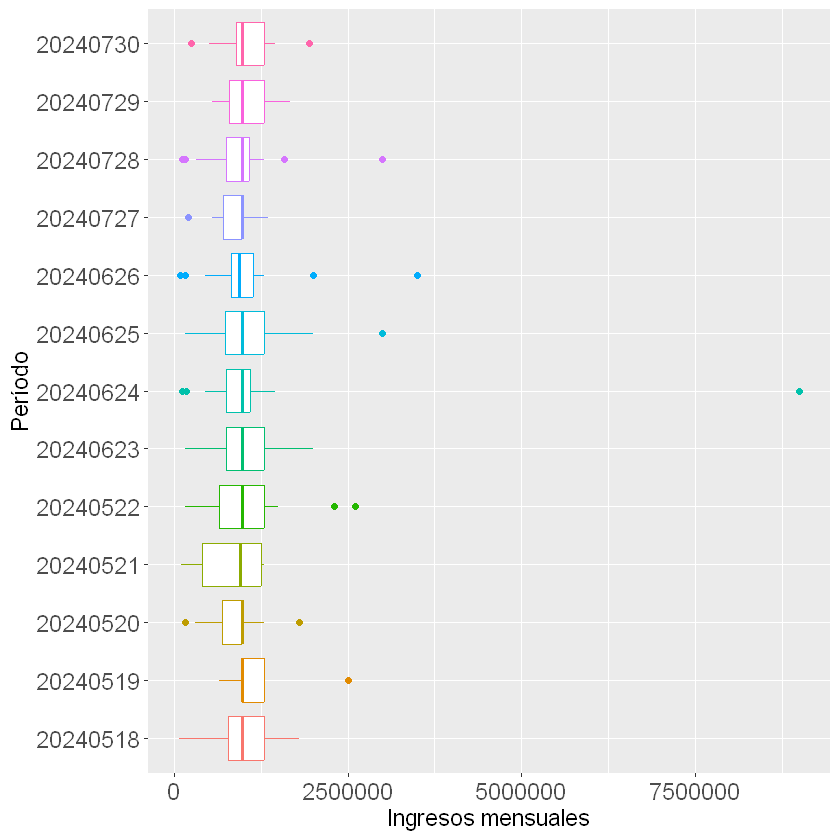

In [41]:
library(ggplot2)

# Convertir datos a numérico
formas_trabajo$P3087S1 <- as.numeric(formas_trabajo$P3087S1)

p1 <- ggplot(formas_trabajo, aes(x = PERIODO, y = P3087S1, col = PERIODO)) +
  geom_boxplot() + 
  theme(
    legend.position = 'none',
    axis.text = element_text(size = 14),
    axis.title = element_text(size = 14)
  ) +
  coord_flip()

p1 <- p1 + ylab("Ingresos mensuales") + xlab("Período")
print(p1)

In [ ]:
muestra <- formas_trabajo$P3087S1

# Estadísticos ignorando NA
media <- mean(muestra, na.rm = TRUE)
desv <- sd(muestra, na.rm = TRUE)
N <- sum(!is.na(muestra))  # Cuenta solo valores no NA

error.est <- desv / sqrt(N)
error <- 1.96 * error.est
lim.inf <- media - error
lim.sup <- media + error

resultado1 <- data.frame(media, desv, N, error.est, error, lim.inf, lim.sup)
print(round(t(resultado1), 1))


               [,1]
media      998708.3
desv       621977.4
N             336.0
error.est   33931.6
error       66506.0
lim.inf    932202.3
lim.sup   1065214.4
